In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [2]:
# Load and preprocess the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Define function to build CNN
def build_cnn(num_filters):
    model = Sequential()
    # Add first convolutional layer
    model.add(Conv2D(num_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Add second convolutional layer
    model.add(Conv2D(num_filters, kernel_size=(3, 3), activation='relu'))
    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the output for the fully connected layer
    model.add(Flatten())
    # Add fully connected layer
    model.add(Dense(100, activation='relu'))
    # Add dropout layer
    model.add(Dropout(0.3))
    # Add output layer
    model.add(Dense(10, activation='softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_and_evaluate(num_filters):
    model = build_cnn(num_filters)
    history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=0)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    return loss, val_loss, accuracy, val_accuracy

# Define different numbers of filters per layer
num_filters_list = [16, 32]

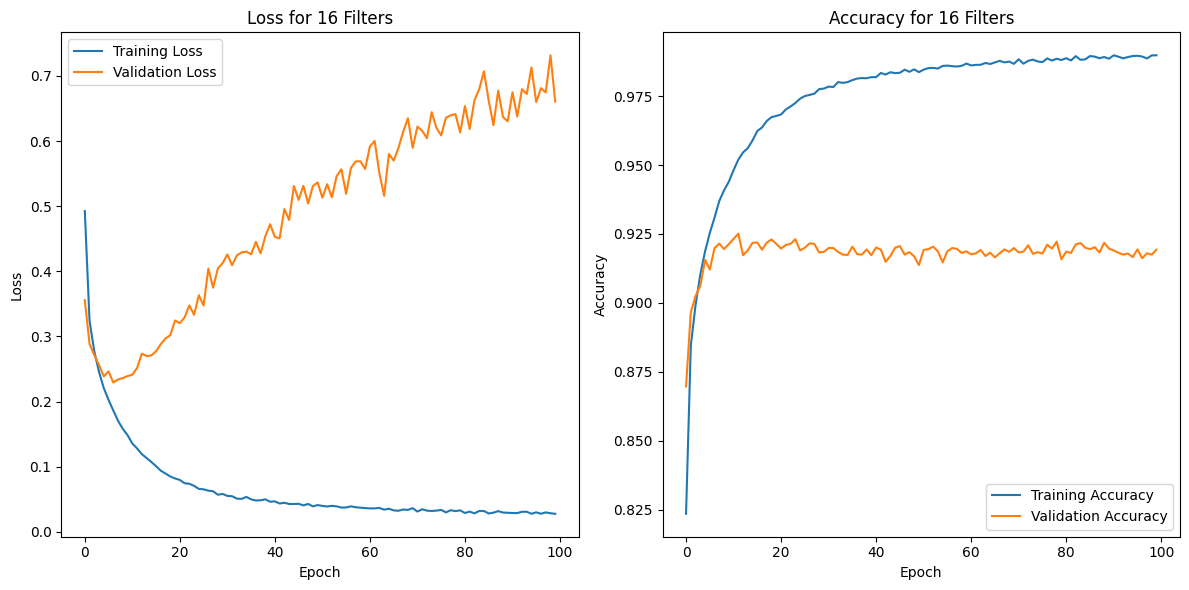

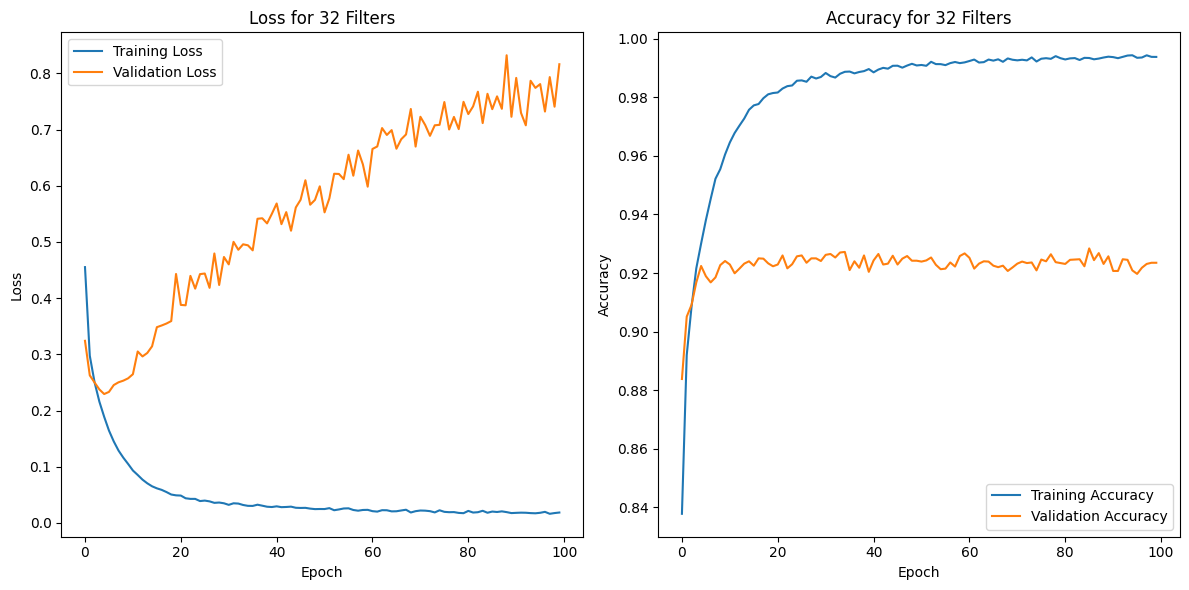

In [7]:
# Train and evaluate the models for different numbers of filters
for num_filters in num_filters_list:
    loss, val_loss, accuracy, val_accuracy = train_and_evaluate(num_filters)
    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss for {} Filters'.format(num_filters))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy for {} Filters'.format(num_filters))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()